In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
dataset = pd.read_csv('Breast_Cancer.csv')
dataset

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
lab=LabelEncoder()

In [ ]:
dataset.shape

(4024, 16)

In [ ]:
dataset['Race']=lab.fit_transform(dataset['Race'])
dataset['Marital Status']=lab.fit_transform(dataset['Marital Status'])
dataset['N Stage']=lab.fit_transform(dataset['N Stage'])
dataset['6th Stage']=lab.fit_transform(dataset['6th Stage'])
dataset['differentiate']=lab.fit_transform(dataset['differentiate'])
dataset['Grade']=lab.fit_transform(dataset['Grade'])
dataset['A Stage']=lab.fit_transform(dataset['A Stage'])
dataset['Estrogen Status']=lab.fit_transform(dataset['Estrogen Status'])
dataset['Progesterone Status']=lab.fit_transform(dataset['Progesterone Status'])
dataset['Status']=lab.fit_transform(dataset['Status'])
dataset['T Stage ']=lab.fit_transform(dataset['T Stage '])

In [ ]:
dataset

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [ ]:
X=dataset.drop(['Status'], axis=1)

In [ ]:
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72


In [ ]:
Y=dataset['Status']

In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int32

In [ ]:
(X_train, X_test, y_train, y_test)=train_test_split(X,Y,test_size=0.3, stratify=Y)

In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(2816, 15) (1208, 15) (2816,) (1208,)


In [ ]:
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

In [ ]:
x_train = tf.data.Dataset.from_tensor_slices(X_train)
y_train = tf.data.Dataset.from_tensor_slices(Y_train)

x_test = tf.data.Dataset.from_tensor_slices(X_test)
y_test = tf.data.Dataset.from_tensor_slices(Y_test)

In [ ]:
x_train

<TensorSliceDataset element_spec=TensorSpec(shape=(15,), dtype=tf.float64, name=None)>

In [ ]:
def initialize_parameters():
                                
    initializer = tf.keras.initializers.GlorotNormal(seed = 1)
    initializer2 = tf.keras.initializers.zeros()
    layer_dims=[15,15,5,3,1]

    W1 = tf.Variable(initializer(shape=(layer_dims[0], layer_dims[1]), dtype=tf.float64))
    gama1 = tf.Variable(initializer(shape=(1, layer_dims[1]), dtype=tf.float64))
    beta1 = tf.Variable(initializer(shape=(1, layer_dims[1]), dtype=tf.float64))
    W2 = tf.Variable(initializer(shape=(layer_dims[1], layer_dims[2]), dtype=tf.float64))
    gama2 = tf.Variable(initializer(shape=(1, layer_dims[2]), dtype=tf.float64))
    beta2 = tf.Variable(initializer(shape=(1, layer_dims[2]), dtype=tf.float64))
    W3 = tf.Variable(initializer(shape=(layer_dims[2], layer_dims[3]), dtype=tf.float64))
    gama3 = tf.Variable(initializer(shape=(1, layer_dims[3]), dtype=tf.float64))
    beta3 = tf.Variable(initializer(shape=(1, layer_dims[3]), dtype=tf.float64))
    W4 = tf.Variable(initializer(shape=(layer_dims[3], layer_dims[4]), dtype=tf.float64))
    b4 =  tf.Variable(initializer(shape=(1, layer_dims[4]), dtype=tf.float64))


    bn_param={"running_mean1": tf.Variable(initializer2(shape=(1, layer_dims[1]), dtype=tf.float64)),
              "running_var1": tf.Variable(initializer2(shape=(1, layer_dims[1]), dtype=tf.float64)),
              "running_mean2": tf.Variable(initializer2(shape=(1, layer_dims[2]), dtype=tf.float64)),
              "running_var2": tf.Variable(initializer2(shape=(1, layer_dims[2]), dtype=tf.float64)),
              "running_mean3": tf.Variable(initializer2(shape=(1, layer_dims[3]), dtype=tf.float64)),
              "running_var3": tf.Variable(initializer2(shape=(1, layer_dims[3]), dtype=tf.float64))}

    parameters = {"W1": W1,
                  "gama1": gama1,
                  "beta1": beta1,
                  "W2": W2,
                  "gama2": gama2,
                  "beta2": beta2,
                  "W3": W3,
                  "gama3": gama3,
                  "beta3": beta3,
                  "W4": W4,
                  "b4": b4
                  }

    return parameters, bn_param

In [ ]:
def batchnorm_forward(z, layer, parameters, bn_param, training):

    eps = 1e-8
    momentum = 0.9
    initializer2 = tf.keras.initializers.zeros()
    running_mean = bn_param.get('running_mean'+str(layer), tf.Variable(initializer2(shape=z.shape)))
    running_var = bn_param.get('running_var'+str(layer), tf.Variable(initializer2(shape=z.shape)))

    gamma = parameters['gama'+str(layer)]
    beta = parameters['beta'+str(layer)]

    if training:
        sample_mean,sample_var = tf.nn.moments(z,[0])
        running_mean = tf.math.add(tf.math.multiply((momentum),running_mean),tf.math.multiply((1 - momentum),sample_mean))
        running_var = tf.math.add(tf.math.multiply((momentum),running_var),tf.math.multiply((1 - momentum),sample_var))

        out=tf.nn.batch_normalization(z,running_mean,sample_var,beta,gamma,eps)
        
        
    else:
        out=tf.nn.batch_normalization(z,running_mean,running_var,beta,gamma,eps)
    

    # Store the updated running means back into bn_param
    bn_param['running_mean'+str(layer)] = running_mean
    bn_param['running_var'+str(layer)] = running_var

    return out

In [ ]:
def forward_propagation(X, parameters, bn_param, training=True):

    W1 = parameters['W1']
    gama1 = parameters['gama1']
    beta1 = parameters['beta1']
    W2 = parameters['W2']
    gama2 = parameters['gama2']
    beta2 = parameters['beta2']
    W3 = parameters['W3']
    gama3 = parameters['gama3']
    beta3 = parameters['beta3']
    W4 = parameters['W4']
    b4 = parameters['b4']

    Z1 = tf.linalg.matmul(X,W1)
    A1 = tf.keras.activations.relu(batchnorm_forward(Z1, 1, parameters, bn_param, training))

    Z2 = tf.linalg.matmul(A1,W2)
    A2 = tf.keras.activations.relu(batchnorm_forward(Z2, 2, parameters, bn_param, training))

    Z3 = tf.linalg.matmul(A2,W3)
    A3 = tf.keras.activations.relu(batchnorm_forward(Z3, 3, parameters, bn_param, training))

    Z4= tf.math.add(tf.linalg.matmul(A3,W4),b4)
    A4 = tf.keras.activations.sigmoid(Z4)
    
    return Z4

In [ ]:
def compute_cost(logits, labels, lambd, parameters, m):
    
    #L2 = (lambd/(2*m))*(np.sum(np.square(parameters["W1"]))+np.sum(np.square(parameters["W2"]))+np.sum(np.square(parameters["W3"])))
    #cost = tf.add(tf.reduce_mean(tf.keras.metrics.binary_crossentropy(labels,logits,from_logits=True)),L2)
    cost = tf.reduce_mean(tf.keras.metrics.binary_crossentropy(labels,logits,from_logits=True))
    return cost

In [ ]:
def printProgressBar (iteration, total,epoch,epoch_cost,train_accuracy,test_accuracy, suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):

    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    train_perecentage = int(train_accuracy*100)
    test_perecentage = int(test_accuracy*100)
    print(f'\rCost after epoch{epoch}:{epoch_cost} |{bar}| {percent}% - accurracy: (train:{train_perecentage}%),(test:{test_perecentage}%)', end = printEnd)
    # Print New Line on Complete
    if iteration == total:
        print()

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 1500, minibatch_size = 64, print_cost = True):


    costs = []                                        # To keep track of the cost
    train_acc = []
    test_acc = []

    parameters,bn_param = initialize_parameters()

    W1 = parameters['W1']
    gama1 = parameters['gama1']
    beta1 = parameters['beta1']
    W2 = parameters['W2']
    gama2 = parameters['gama2']
    beta2 = parameters['beta2']
    W3 = parameters['W3']
    gama3 = parameters['gama3']
    beta3 = parameters['beta3']
    W4 = parameters['W4']
    b4 = parameters['b4']

    

    # The BinaryAccuracy will track the accuracy for this multiclass problem
    test_accuracy = tf.keras.metrics.BinaryAccuracy()
    train_accuracy = tf.keras.metrics.BinaryAccuracy()

    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))

    # We can get the number of elements of a dataset using the cardinality method
    m = dataset.cardinality().numpy()

    minibatches = dataset.batch(minibatch_size).prefetch(8)
    test_minibatches = test_dataset.batch(minibatch_size).prefetch(8)
    #X_train = X_train.batch(minibatch_size, drop_remainder=True).prefetch(8)# <<< extra step
    #Y_train = Y_train.batch(minibatch_size, drop_remainder=True).prefetch(8) # loads memory faster
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    # Do the training loop
    for epoch in range(num_epochs+1):

        epoch_cost = 0.

        #We need to reset object to start measuring from 0 the accuracy each epoch
        train_accuracy.reset_states()


        for (minibatch_X, minibatch_Y) in minibatches:

            with tf.GradientTape() as tape:
                # 1. predict
                A4 = forward_propagation(minibatch_X, parameters, bn_param, training=True)

                # 2. loss
                minibatch_cost = compute_cost(A4, minibatch_Y,0.8,parameters,minibatch_X.shape[0])

            # We accumulate the accuracy of all the batches
            train_accuracy.update_state(minibatch_Y, A4)

            trainable_variables = [W1, gama1, beta1, W2, gama2, beta2, W3, gama3, beta3, W4, b4]
            grads = tape.gradient(minibatch_cost, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_cost += minibatch_cost

        # We divide the epoch cost over the number of samples
        epoch_cost /= m

        # Print the cost every 10 epochs
        if print_cost == True and epoch % 10 == 0:


            # We evaluate the test set every 10 epochs to avoid computational overhead
            for (minibatch_X, minibatch_Y) in test_minibatches:
                A4 = forward_propagation(minibatch_X, parameters, bn_param, training=False)
                test_accuracy.update_state(minibatch_Y, A4)


            print(f"epoch: {epoch} , cost: {epoch_cost} , Train: {train_accuracy.result()*100}% , Dev: {test_accuracy.result()*100}%")

            costs.append(epoch_cost)
            train_acc.append(train_accuracy.result())
            test_acc.append(test_accuracy.result())
            test_accuracy.reset_states()


    return parameters, bn_param, costs, train_acc, test_acc

In [ ]:
parameters, bn_param, costs, train_acc, test_acc = model(x_train, y_train, x_test, y_test, num_epochs=120, learning_rate = 0.002)

epoch: 0 , cost: 0.011067832333673257 , Train: 84.73011016845703% , Dev: 84.93377685546875%
epoch: 10 , cost: 0.004910679915010784 , Train: 86.07954406738281% , Dev: 86.9205322265625%
epoch: 20 , cost: 0.004476512948752333 , Train: 89.20454406738281% , Dev: 89.23841094970703%
epoch: 30 , cost: 0.004383879750347744 , Train: 89.59516906738281% , Dev: 89.3211898803711%
epoch: 40 , cost: 0.004299322685778601 , Train: 89.66619110107422% , Dev: 89.48675537109375%
epoch: 50 , cost: 0.004227599397485342 , Train: 90.02130889892578% , Dev: 89.6523208618164%
epoch: 60 , cost: 0.00417519118696915 , Train: 90.234375% , Dev: 89.56954193115234%
epoch: 70 , cost: 0.004136823046385031 , Train: 90.66051483154297% , Dev: 89.56954193115234%
epoch: 80 , cost: 0.00411362723995647 , Train: 90.58948516845703% , Dev: 89.56954193115234%
epoch: 90 , cost: 0.0040917468316815165 , Train: 90.625% , Dev: 89.48675537109375%
epoch: 100 , cost: 0.004080176130443088 , Train: 90.73152923583984% , Dev: 89.56954193115234%


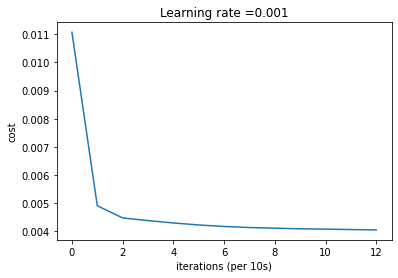

In [ ]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per 10s)')
plt.title("Learning rate =" + str(0.001))
plt.show()

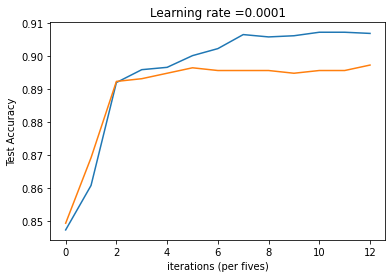

In [ ]:
# Plot the train accuracy
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()

In [ ]:
print("train accuracy: %.2f"%train_acc[-1])

train accuracy: 0.91


In [ ]:
print("test accuracy: %.2f"%test_acc[-1])

test accuracy: 0.90
